# Ensembling and CRPS

[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/ai_weather_to_climate_ats780A8/tree/main/lecture_code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/ai_weather_to_climate_ats780A8/blob/main/lecture_code/ensemble_crps.ipynb)

In [5]:
!pip install properscoring

import properscoring as ps
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Gaussian Example

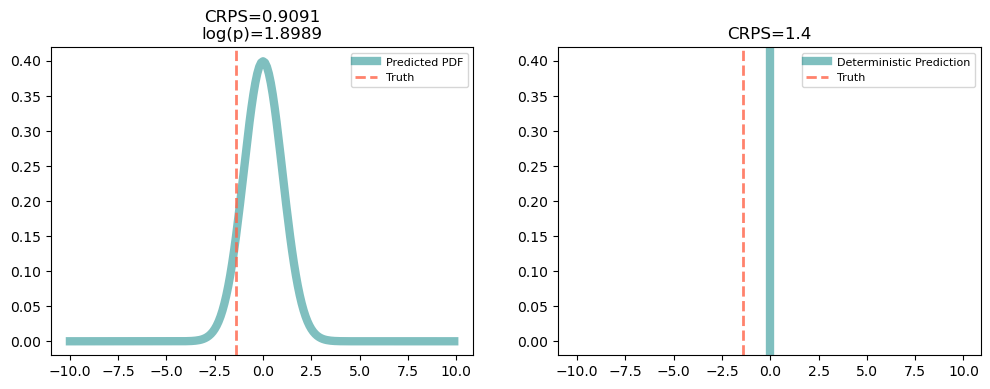

In [78]:
# MODIFY -------------------------
x = np.arange(-10, 10, 0.1)
mu = 0
sigma = 1
truth = -1.4
# --------------------------------

pred_pdf = stats.norm(loc=mu, scale=sigma)
y = pred_pdf.pdf(x)

logp = -np.log(y[np.abs(x - truth).argmin()])
crps = ps.crps_gaussian(truth, mu=mu, sig=sigma)
crps_deterministic = ps.crps_ensemble(truth, forecasts=pred_pdf.mean())

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(x, y, linewidth=6, alpha=.5, color="teal")
plt.axvline(x=truth, color='tomato', linestyle='--', alpha=.8, linewidth=2)
plt.title(f"CRPS={round(crps, 4)}\nlog(p)={round(logp, 4)}")
xlim, ylim = plt.xlim(), plt.ylim()
plt.legend(["Predicted PDF", "Truth"], fontsize=8)

plt.subplot(1,2,2)
plt.axvline(x=pred_pdf.mean(), linewidth=6, alpha=.5, color="teal")
plt.axvline(x=truth, color='tomato', linestyle='--', alpha=.8, linewidth=2)
plt.title(f"CRPS={round(crps_deterministic, 4)}")
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend(["Deterministic Prediction", "Truth"], fontsize=8)

plt.show()

## Ensemble

After testing out the code below, try a few examples where the truth is more extreme than any ensemble member.

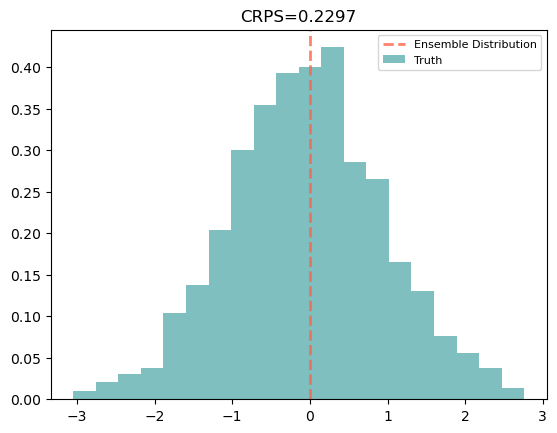

In [80]:
# MODIFY -------------------------
n_ens = 1000
truth = 0

## test out different distributions by uncommenting
ensemble = np.random.RandomState(0).normal(0, 1, n_ens)
# ensemble = np.random.RandomState(0).uniform(-1, 1, n_ens)
# ensemble = np.random.RandomState(0).lognormal(0, 1, n_ens)
# ensemble = (.4, .2, 3, 6, 8, 10, .2, -.1)
# --------------------------------

crps = ps.crps_ensemble(truth, ensemble)

plt.hist(ensemble, bins=20, density=True, alpha=0.5, color="teal")
plt.axvline(x=truth, color='tomato', linestyle='--', alpha=.8, linewidth=2)
plt.title(f"CRPS={round(crps, 4)}")
plt.legend(["Ensemble Distribution", "Truth"], fontsize=8)
plt.show()